In [2]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pathlib import Path
import numpy as np 
from datetime import datetime,date
import yfinance as yf

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ddevii/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
cryptocurrencies = ['BTC-USD']
start_date = "2020-01-03"
end_date = "2022-07-07"
bitcoin_data = yf.download(cryptocurrencies, start_date, end_date)
bitcoin_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327
...,...,...,...,...,...,...
2022-07-03,19242.095703,19558.269531,18966.951172,19297.076172,19297.076172,16390821947
2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990


In [5]:
sfo_data_df = pd.read_csv(
    Path("/Users/ddevii/Rutgers/Project-102-CryptoCovid_ML/Resources/Bitcoin_tweets.csv")
)

/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
btc_tweets = sfo_data_df.drop(
    columns=[
        "user_name","user_location", "is_retweet", "user_description", "user_created", "user_followers", "user_friends", "user_favourites", "user_verified", "hashtags", "source"
        ]
)

btc_tweets



,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...
...,...,...
3840621,2022-07-02 17:36:39,#BTC Derivs Sheet (Tweet every 15 min.)\nCME D...
3840622,2022-07-02 17:36:13,to loveor how long it wil ##blockchain #btc #e...
3840623,2022-07-02 17:36:11,@WatcherGuru GREAT，Smart and visionary people ...
3840624,2022-07-02 17:36:10,#BTC RSI is trending down. https://t.co/h1g3AK...


In [7]:
btc_tweets.isna().sum()

date    182
text    182
dtype: int64

In [8]:
btc=btc_tweets.dropna(subset=["date"])
btc

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...
...,...,...
3840621,2022-07-02 17:36:39,#BTC Derivs Sheet (Tweet every 15 min.)\nCME D...
3840622,2022-07-02 17:36:13,to loveor how long it wil ##blockchain #btc #e...
3840623,2022-07-02 17:36:11,@WatcherGuru GREAT，Smart and visionary people ...
3840624,2022-07-02 17:36:10,#BTC RSI is trending down. https://t.co/h1g3AK...


In [9]:
btc.isna().sum()

date    0
text    0
dtype: int64

In [10]:
bitcoin_sentiments = []
for index, row in btc.iterrows():
    try:
        text = row["text"]
        date = row["date"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        passtext = row["text"]
        date = row["date"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass


In [11]:
bitcoin_sentiments

[{'text': 'Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI',
  'date': '2021-02-10',
  'compound': 0.296,
  'positive': 0.145,
  'negative': 0.0,
  'neutral': 0.855},
 {'text': '😎 Today, that\'s this #Thursday, we will do a "🎬 Take 2" with our friend @LeoWandersleb, #Btc #wallet #security expe… https://t.co/go6aDgRml5',
  'date': '2021-02-10',
  'compound': 0.4939,
  'positive': 0.151,
  'negative': 0.0,
  'neutral': 0.849},
 {'text': 'Guys evening, I have read this article about BTC and would like to share with you all - https://t.co/QxCZgmuy3B… https://t.co/o6wn7ppkVY',
  'date': '2021-02-10',
  'compound': 0.5719,
  'positive': 0.227,
  'negative': 0.0,
  'neutral': 0.773},
 {'text': '$BTC A big chance in a billion! Price: \\4872644.0 (2021/02/11 08:51) #Bitcoin #FX #BTC #crypto',
  'date': '2021-02-10',
  'compound': 0.3164,
  'positive': 0.16,
  'negative': 0.0,
  'neutral': 0.84},
 {'text': 'T

In [64]:
bitcoin_tweets_df = pd.DataFrame(bitcoin_sentiments, columns=[ "text", "date", "compound", "positive", "negative", "neutral"])
bitcoin_tweets_df

,text,date,compound,positive,negative,neutral
0,Blue Ridge Bank shares halted by NYSE after #b...,2021-02-10,0.2960,0.145,0.00,0.855
1,"😎 Today, that's this #Thursday, we will do a ""...",2021-02-10,0.4939,0.151,0.00,0.849
2,"Guys evening, I have read this article about B...",2021-02-10,0.5719,0.227,0.00,0.773
3,$BTC A big chance in a billion! Price: \487264...,2021-02-10,0.3164,0.160,0.00,0.840
4,This network is secured by 9 508 nodes as of t...,2021-02-10,0.4019,0.109,0.00,0.891
...,...,...,...,...,...,...
3840439,#BTC Derivs Sheet (Tweet every 15 min.)\nCME D...,2022-07-02,0.0343,0.124,0.16,0.716
3840440,to loveor how long it wil ##blockchain #btc #e...,2022-07-02,0.0000,0.000,0.00,1.000
3840441,@WatcherGuru GREAT，Smart and visionary people ...,2022-07-02,0.5267,0.327,0.00,0.673
3840442,#BTC RSI is trending down. https://t.co/h1g3AK...,2022-07-02,0.0000,0.000,0.00,1.000


In [65]:
bitcoin_sentimentalism = bitcoin_tweets_df.groupby(["date"]).agg("mean")
bitcoin_sentimentalism


,compound,positive,negative,neutral
date,,,,
20,0.000000,0.000000,0.000000,1.000000
2021-02-05,0.125521,0.076545,0.030948,0.892505
2021-02-06,0.129958,0.075691,0.028137,0.896164
2021-02-07,0.139586,0.080284,0.028704,0.891010
2021-02-08,0.157370,0.086407,0.025700,0.887891
...,...,...,...,...
['YieldFar,0.000000,0.000000,0.000000,1.000000
['bitcoin',0.000000,0.000000,0.000000,1.000000
['btc'],0.000000,0.000000,0.000000,1.000000


In [ ]:
bitcoin_sentimentalism.to_csv("Project-102-CryptoCovid_ML/Resources")

In [ ]:
btc["date"] = pd.to_datetime(btc["date"])
btc["date"] = btc["date"].dt.date
btc

/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/algotrading/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_location,date,text,is_retweet
0,"Atlanta, GA",2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,False
1,NaN,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",False
2,"London, England",2021-02-10,"Guys evening, I have read this article about B...",False
3,NaN,2021-02-10,$BTC A big chance in a billion! Price: \487264...,False
4,Europa,2021-02-10,This network is secured by 9 508 nodes as of t...,False
5,"Bkk, Thailand",2021-02-10,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,False
6,"Florida, USA",2021-02-10,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,False
7,NaN,2021-02-10,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,False
8,NaN,2021-02-10,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,False
9,"Atlanta, GA",2021-02-10,.@Tesla’s #bitcoin investment is revolutionary...,False


In [3]:
covid = pd.read_csv(
    Path("/Users/ddevii/Rutgers/Project-102-CryptoCovid_ML/Resources/WHO-COVID-19-global-data.csv")
)
covid = covid.rename(columns={"Date_reported":"Date"})
covid

,Date,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
217324,2022-07-03,ZW,Zimbabwe,AFRO,30,255710,0,5558
217325,2022-07-04,ZW,Zimbabwe,AFRO,16,255726,0,5558
217326,2022-07-05,ZW,Zimbabwe,AFRO,29,255755,0,5558
217327,2022-07-06,ZW,Zimbabwe,AFRO,0,255755,0,5558


In [4]:
df_1 = pd.pivot_table(covid, values=["Cumulative_cases", "Cumulative_deaths"], index="Date", columns="Country")
df_1

Cumulative_cases                                                 \
Country         Afghanistan Albania Algeria American Samoa Andorra  Angola   
Date                                                                         
2020-01-03                0       0       0              0       0       0   
2020-01-04                0       0       0              0       0       0   
2020-01-05                0       0       0              0       0       0   
2020-01-06                0       0       0              0       0       0   
2020-01-07                0       0       0              0       0       0   
...                     ...     ...     ...            ...     ...     ...   
2022-07-03           182643  282141  266115           6505   44177  101320   
2022-07-04           182724  282690  266128           6505   44177  101320   
2022-07-05           182793  282837  266164           6505   44177  101320   
2022-07-06           182873  283811  266164           6505   44177  101320   
2022-07-07           182979  284758  266181           6505   44671  101320   

                                                           ...  \
Country    Anguilla Antigua and Barbuda Argentina Armenia  ...   
Date                                                       ...   
2020-01-03        0                   0         0       0  ...   
2020-01-04        0                   0         0       0  ...   
2020-01-05        0                   0         0       0  ...   
2020-01-06        0                   0         0       0  ...   
2020-01-07        0                   0         0       0  ...   
...             ...                 ...       ...     ...  ...   
2022-07-03     3456                8656   9394326  423243  ...   
2022-07-04     3456                8665   9394326  423417  ...   
2022-07-05     3456                8665   9394326  423417  ...   
2022-07-06     3476                8665   9394326  423417  ...   
2022-07-07     3476                8668   9394326  423417  ...   

           Cumulative_deaths                     \
Country              Uruguay Uzbekistan Vanuatu   
Date                                              
2020-01-03                 0          0       0   
2020-01-04                 0          0       0   
2020-01-05                 0          0       0   
2020-01-06                 0          0       0   
2020-01-07                 0          0       0   
...                      ...        ...     ...   
2022-07-03              7351       1637      14   
2022-07-04              7351       1637      14   
2022-07-05              7351       1637      14   
2022-07-06              7351       1637      14   
2022-07-07              7351       1637      14   

                                                                          \
Country    Venezuela (Bolivarian Republic of) Viet Nam Wallis and Futuna   
Date                                                                       
2020-01-03                                  0        0                 0   
2020-01-04                                  0        0                 0   
2020-01-05                                  0        0                 0   
2020-01-06                                  0        0                 0   
2020-01-07                                  0        0                 0   
...                                       ...      ...               ...   
2022-07-03                               5734    43087                 7   
2022-07-04                               5735    43087                 7   
2022-07-05                               5735    43088                 7   
2022-07-06                               5735    43088                 7   
2022-07-07                               5735    43089                 7   

                                  \
Country    Yemen Zambia Zimbabwe   
Date                               
2020-01-03     0      0        0   
2020-01-04     0      0        0   
2020-01-05     0      0        0 

<AxesSubplot:xlabel='Date'>

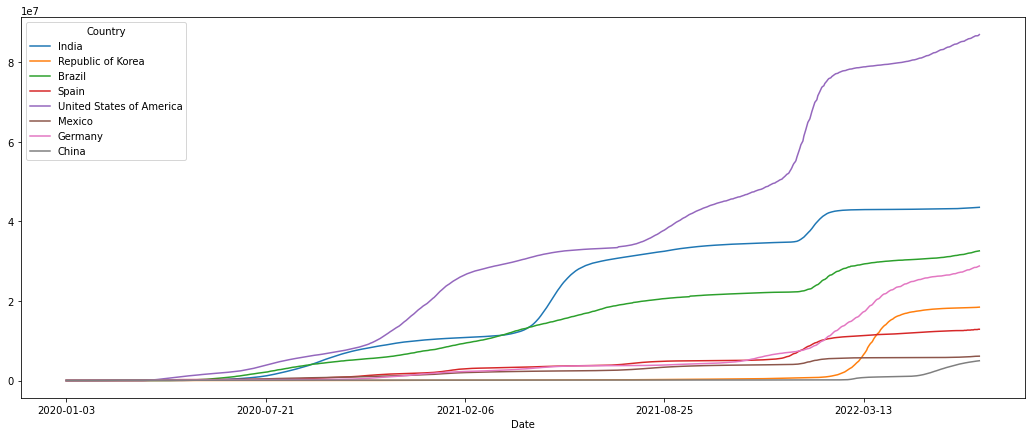

In [5]:
top10_btc_covid_cases = df_1["Cumulative_cases"][["India", "Republic of Korea", "Brazil", "Spain", "United States of America", "Mexico", "Germany", "China"]]
top10_btc_covid_cases.plot(figsize =(18,7))

In [6]:
top10_btc_covid_cases.to_csv("top8_btc_covid_cases.csv")

<AxesSubplot:xlabel='Date'>

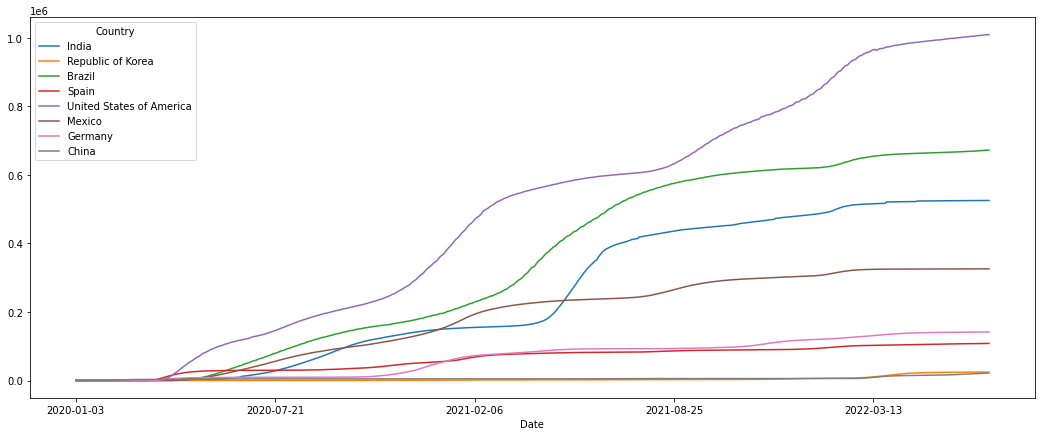

In [68]:
df_1 = pd.pivot_table(covid, values=["Cumulative_deaths"], index="Date", columns="Country")

top10_btc_covid_deaths = df_1["Cumulative_deaths"][["India", "Republic of Korea", "Brazil", "Spain", "United States of America", "Mexico", "Germany", "China"]]
top10_btc_covid_deaths.plot(figsize =(18,7))

In [45]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598
2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,28767291327
...,...,...,...,...,...,...
2022-07-03,19242.095703,19558.269531,18966.951172,19297.076172,19297.076172,16390821947
2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990


In [70]:
top10_btc_covid_deaths.to_csv("top10_btc_covid_deaths.csv")

In [ ]:
bitcoin = pd.concat([df_1["Cumulative_case"][["Albania", "..."]], bitcoin])

In [35]:
df = covid.loc[covid["Country_code"] == "AL", ["Date_reported",  "Cumulative_cases", "Cumulative_deaths"]]
df

,Date_reported,Cumulative_cases,Cumulative_deaths
917,2020-01-03,0,0
918,2020-01-04,0,0
919,2020-01-05,0,0
920,2020-01-06,0,0
921,2020-01-07,0,0
...,...,...,...
1829,2022-07-03,282141,3501
1830,2022-07-04,282690,3502
1831,2022-07-05,282837,3504
1832,2022-07-06,283811,3506


In [ ]:
top10_btc_holders = ["India", "South Korea", "Brazil", "Spain", "US", "Mexico", "Germany", "China"]